1. Exploratory Data Analysis (EDA):

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# Load the dataset
data = pd.read_csv(r"C:\Users\csaru\Downloads\train.csv")



In [3]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58,47,...,Right,7.7,NaN,8.1,2,High,Talent Hunt,8.0,0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69,70,...,Any,5.3,0.0,NaN,3,Medium,Source,3.0,0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43,45,...,Left,4.7,0.0,6.6,5,Low,Academy,2.0,0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73,76,...,Right,8.6,113.0,8.6,6,Medium,Academy,13.0,16,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61,74,...,Right,NaN,0.0,5.7,5,Medium,Academy,4.0,0,0


In [4]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)


                age  ball_controlling_skills  body_reflexes  body_balance  \
count  13994.000000             13581.000000   13994.000000  13994.000000   
mean      21.135844                56.043958      61.934329     62.753323   
std        5.162719                16.787353      14.931963     14.203638   
min       16.000000                 5.000000      12.000000      9.000000   
25%       17.000000                51.000000      54.000000     55.000000   
50%       20.000000                61.000000      64.000000     65.000000   
75%       24.000000                67.000000      72.000000     73.000000   
max       61.000000                95.000000      96.000000     97.000000   

       jumping_skills  penalties_conversion_rate  mental_strength  \
count    13970.000000               13964.000000     13966.000000   
mean        63.612026                  48.495703        56.768366   
std         11.938712                  15.767506        11.977744   
min         14.000000         


# Data visualization

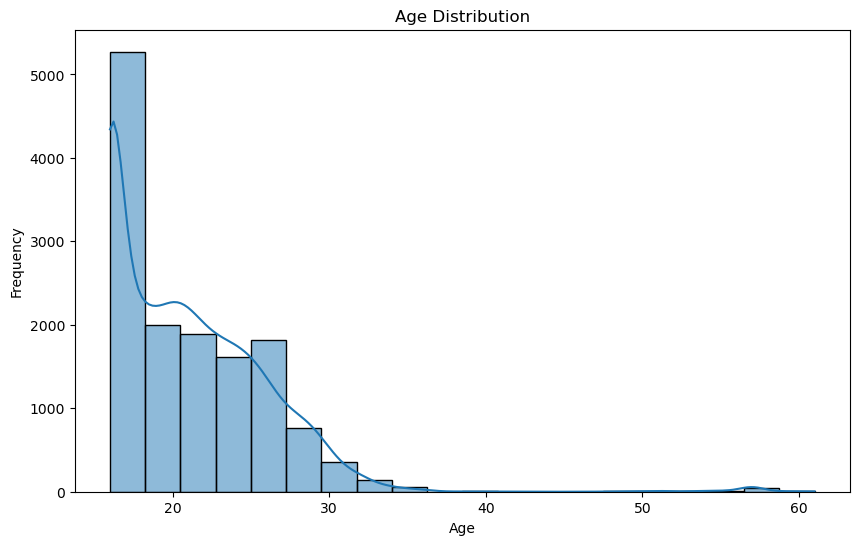

In [5]:
# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




C:\Users\csaru\AppData\Local\Temp\ipykernel_9852\1486461723.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


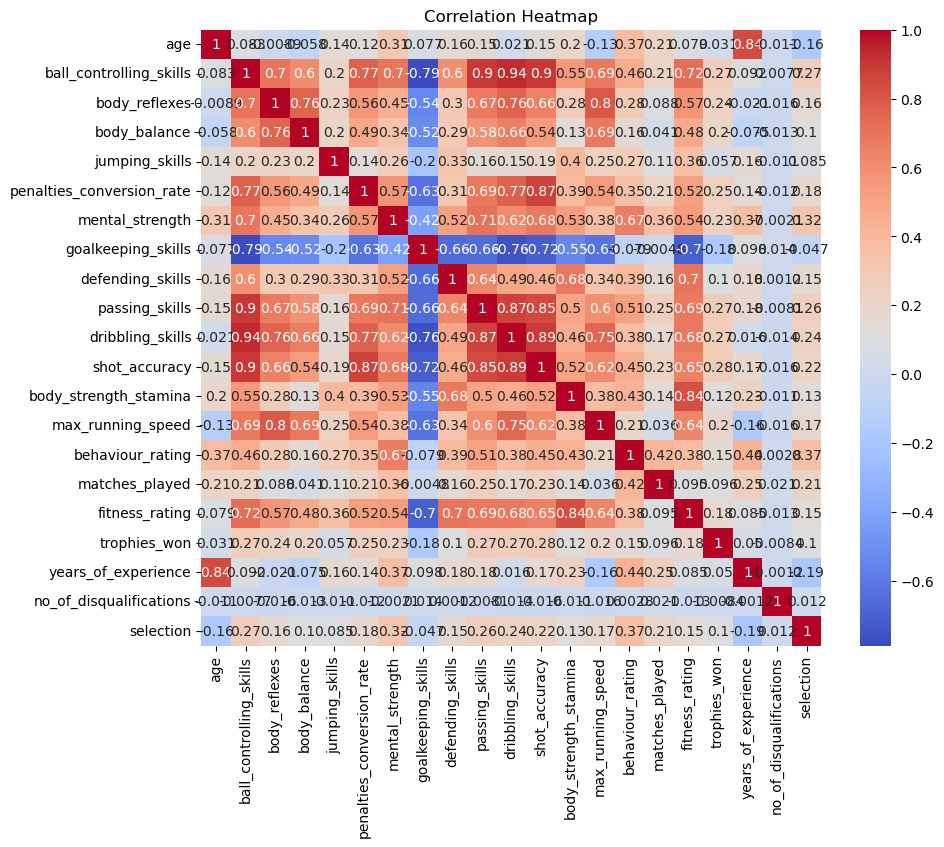

In [6]:
# Correlation heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

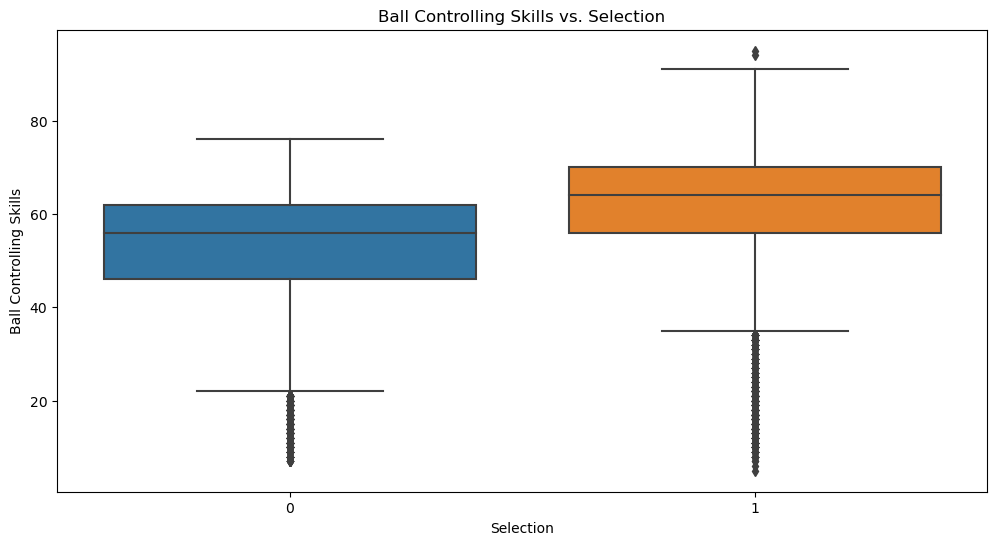

In [7]:
# Relationships between features and selection
plt.figure(figsize=(12, 6))
sns.boxplot(x='selection', y='ball_controlling_skills', data=data)
plt.title('Ball Controlling Skills vs. Selection')
plt.xlabel('Selection')
plt.ylabel('Ball Controlling Skills')
plt.show()



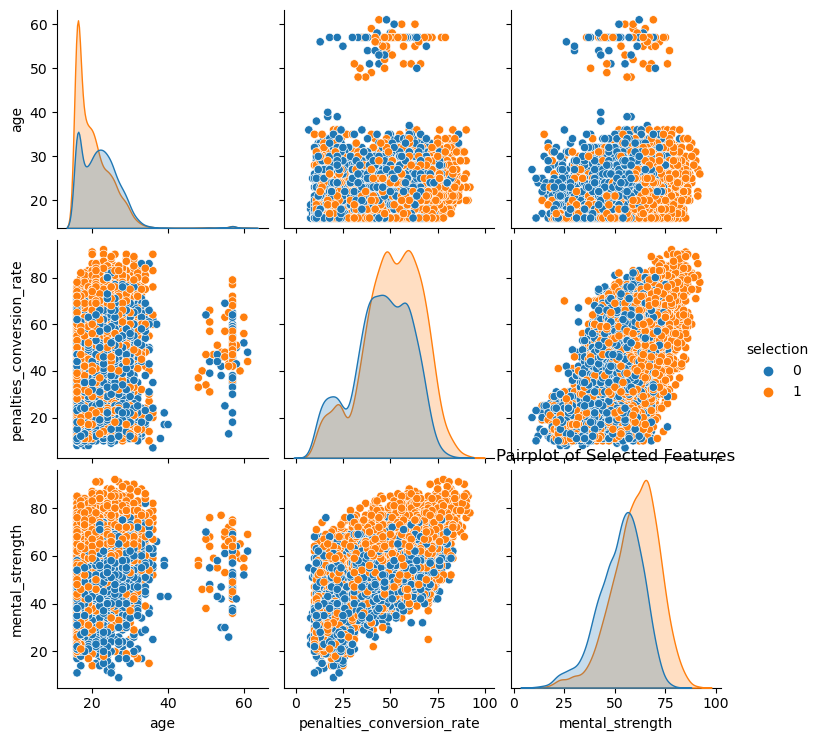

In [8]:
# Pairplot for selected features
selected_features = ['age', 'height', 'weight', 'penalties_conversion_rate', 'mental_strength', 'selection']
sns.pairplot(data[selected_features], hue='selection')
plt.title('Pairplot of Selected Features')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [10]:
# Find missing values
missing_values = data.isnull().sum()

# Display columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
gender                        19
weight                       417
ball_controlling_skills      413
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
shot_accuracy                572
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
coaching                     125
years_of_experience          144
dtype: int64


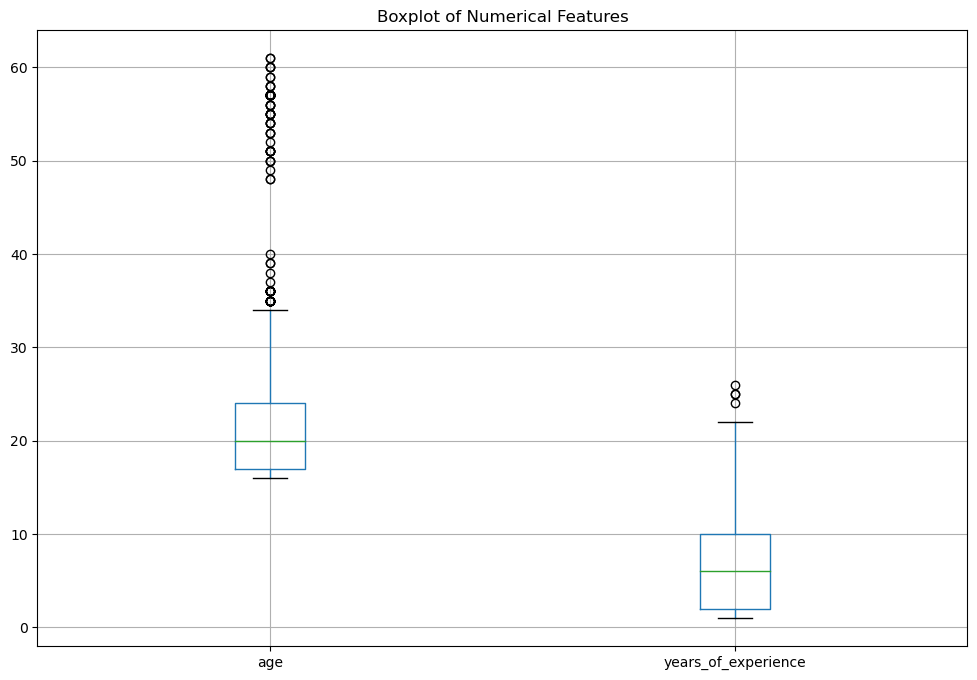

In [11]:
# Visualize distribution and detect outliers
numerical_features = ['age', 'height', 'weight', 'years_of_experience']
plt.figure(figsize=(12, 8))
data[numerical_features].boxplot()
plt.title('Boxplot of Numerical Features')
plt.show()

Step 2: Handling Missing Values

In [12]:
import re
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [13]:
# Detect missing values
missing_values = data.isnull().sum()
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Handle missing values

# Convert 'height' to numeric
data['height'] = data['height'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else np.nan)

# Convert 'weight' to numeric
data['weight'] = data['weight'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else np.nan)

Columns with missing values:
gender                        19
weight                       417
ball_controlling_skills      413
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
shot_accuracy                572
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
coaching                     125
years_of_experience          144
dtype: int64


In [14]:
from sklearn.impute import SimpleImputer

categorical_features = ['coaching']
imputer_categorical = SimpleImputer(strategy='most_frequent')
data[categorical_features] = imputer_categorical.fit_transform(data[categorical_features])


In [15]:
from scipy.stats import zscore


In [16]:
# Handle missing values
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['weight'].fillna(data['weight'].median(), inplace=True)

In [17]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])
print("Columns with missing values:")

ball_controlling_skills      413
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
shot_accuracy                572
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
years_of_experience          144
dtype: int64
Columns with missing values:


In [18]:
# Handling missing values
data.dropna(inplace=True)


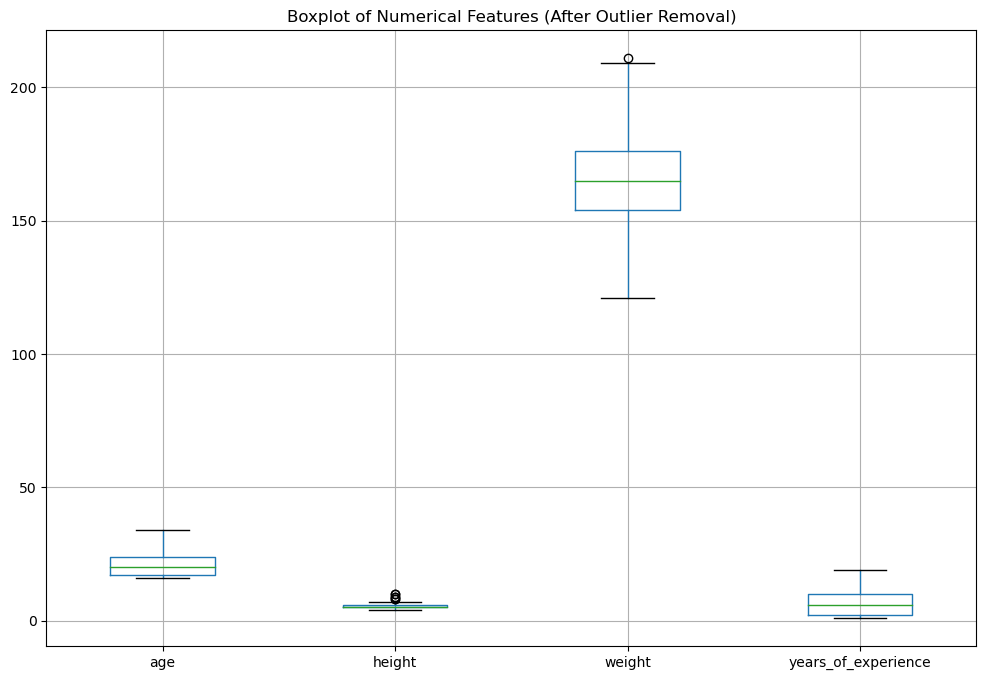

In [19]:
from scipy.stats import zscore

# Remove outliers using z-score
z_scores = np.abs(zscore(data[numerical_features]))
outliers = (z_scores > 3).any(axis=1)
data_cleaned = data[~outliers]

# Visualize distribution after removing outliers
plt.figure(figsize=(12, 8))
data_cleaned[numerical_features].boxplot()
plt.title('Boxplot of Numerical Features (After Outlier Removal)')
plt.show()


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import numpy as np
from scipy.stats import zscore





In [21]:
# Splitting data into train and test sets
X = data_cleaned.drop(['player_id', 'name', 'selection','coaching'], axis=1)
y = data_cleaned['selection']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (8349, 26)
Shape of X_test: (2088, 26)
Shape of y_train: (8349,)
Shape of y_test: (2088,)


In [22]:
# Update categorical and numerical feature lists based on your dataset
categorical_features = [ 'gender']  # Add 'gender' or other categorical columns
numerical_features = ['age', 'height', 'weight']  # Add numerical columns

# Create a preprocessor for categorical and numerical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Define a column transformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])



In [23]:
# Create the Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.60


In [24]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)


Mean Squared Error: 0.3955938697318008
R-squared (R2) Score: -0.6249563066776584


In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10],
    'classifier__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)


C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linea

C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['gender']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'height',
                                                                          'weight'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__solver': ['lbfgs', 'liblinear', 'sag',
                                                'saga']},
             scoring='accuracy')

In [26]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)


Best Hyperparameters: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}
Accuracy: 0.603448275862069


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("AUC-ROC:", roc_auc)


Accuracy: 0.603448275862069
Precision: [0.5809387  0.63015551 1.        ]
Recall: [1.         0.76834295 0.        ]
F1-Score: 0.6924219910846954
Confusion Matrix:
 [[328 547]
 [281 932]]
AUC-ROC: 0.5716000471087034


In [30]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=20, scoring='accuracy', cv=5)
random_search.fit(X_train, y_train)


C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\csaru\anaconda3\anaconda\lib\site-packages\sklearn\linea

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['gender']),
                                                                              ('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_iter=20,
                   param_distributions={'classifier__C': [0.001, 0.01, 0.1, 1,
                                                          10],
                                        'classifier__max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B6C32AC2B0>,
                                        'classifier__solver': ['lbfgs',
                                                               'liblinear',
                                                               'sag', 'saga']},
                   scoring='accuracy')

In [32]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)  # Replace 'model' with your tuned regression model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score




Mean Squared Error: 0.3955938697318008
